In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
base_path = '../data/processed/' 

dados = pd.read_csv(base_path + 'data.csv')

In [109]:
dados.head()

,id,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,periodo,datetime
0,331730.0,sexta-feira,SP,116,453.0,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Amanhecer,...,0,1,1,"-24,56168114","-47,86752174",SPRF-SP,DEL05-SP,UOP01-DEL05-SP,madrugada,01-01-2021 05:30 AM
1,331804.0,sexta-feira,AM,174,937.0,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,...,1,1,5,"-2,508068","-60,036434",SPRF-AM,DEL01-AM,UOP01-DEL01-AM,manhã,01-01-2021 08:05 AM
2,331815.0,sexta-feira,CE,222,128.5,ITAPAJE,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,...,11,2,12,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE,manhã,01-01-2021 10:10 AM
3,331823.0,sexta-feira,RJ,493,18.0,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,Com Vítimas Feridas,Pleno dia,...,1,1,3,"-22,6687122","-43,01862696",SPRF-RJ,DEL04-RJ,UOP02-DEL04-RJ,tarde,01-01-2021 12:30 PM
4,331843.0,sexta-feira,RJ,393,252.0,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,Com Vítimas Feridas,Pleno dia,...,1,2,3,"-22,43422023","-43,77561487",SPRF-RJ,DEL05-RJ,UOP04-DEL05-RJ,tarde,01-01-2021 02:40 PM


In [110]:
def filtrar_por_br_e_uf(brs, ufs):
    # Garantir que as colunas 'br' e 'uf' sejam strings
    dados['br'] = dados['br'].astype(str)
    dados['uf'] = dados['uf'].astype(str)

    # Converter BRs para strings (caso sejam números)
    brs = [str(br) for br in brs]

    # Filtrar o dataset
    dataset_filtrado = dados[dados['br'].isin(brs) & dados['uf'].isin(ufs)]

    return dataset_filtrado

In [111]:
def grafico_acidentes_por_dia(dataset_filtrado):
    # Definir a ordem correta dos dias da semana
    ordem_dias = ['segunda-feira', 'terça-feira', 'quarta-feira',
                  'quinta-feira', 'sexta-feira', 'sábado', 'domingo']

    # Contar acidentes por dia da semana
    acidentes_por_dia = dataset_filtrado['dia_semana'].value_counts()
    acidentes_por_dia = acidentes_por_dia.reindex(ordem_dias)

    # Criar uma paleta de cores a partir do colormap "YlOrRd"
    cmap = plt.get_cmap("YlOrRd")
    color_list = [cmap(i / (len(acidentes_por_dia) - 1)) for i in range(len(acidentes_por_dia))]

    # Configurar o gráfico
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=acidentes_por_dia.index,
        y=acidentes_por_dia.values,
        palette=color_list,
        hue=acidentes_por_dia.index,  # Associar o hue para mapear as cores
        dodge=False,  # Evitar deslocamento das barras
        legend=False  # Não exibir legenda
    )
    
    # Melhorar os detalhes do gráfico
    plt.title("Quantidade de Acidentes por Dia da Semana", fontsize=16, fontweight='bold')
    plt.xlabel("Dia da Semana", fontsize=14)
    plt.ylabel("Quantidade de Acidentes", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [112]:
def grafico_acidentes_por_periodo(dataset_filtrado):
    # Definir a ordem dos períodos do dia
    ordem_periodos = ['madrugada', 'manhã', 'tarde', 'noite']

    # Contar acidentes por período do dia
    acidentes_por_periodo = dataset_filtrado['periodo'].value_counts()
    acidentes_por_periodo = acidentes_por_periodo.reindex(ordem_periodos)

    # Criar uma paleta de cores a partir do colormap "YlOrRd"
    cmap = plt.get_cmap("YlOrRd")
    color_list = [cmap(i / (len(acidentes_por_periodo) - 1)) for i in range(len(acidentes_por_periodo))]

    # Configurar o gráfico
    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=acidentes_por_periodo.index,
        y=acidentes_por_periodo.values,
        palette=color_list,
        hue=acidentes_por_periodo.index,  # Associar a paleta ao eixo x
        dodge=False,  # Garantir que não haja separação entre categorias
        legend=False  # Desabilitar legenda
    )
    
    # Configurações estéticas
    plt.title("Quantidade de Acidentes por Período do Dia", fontsize=16, fontweight="bold")
    plt.xlabel("Período do Dia", fontsize=14)
    plt.ylabel("Quantidade de Acidentes", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


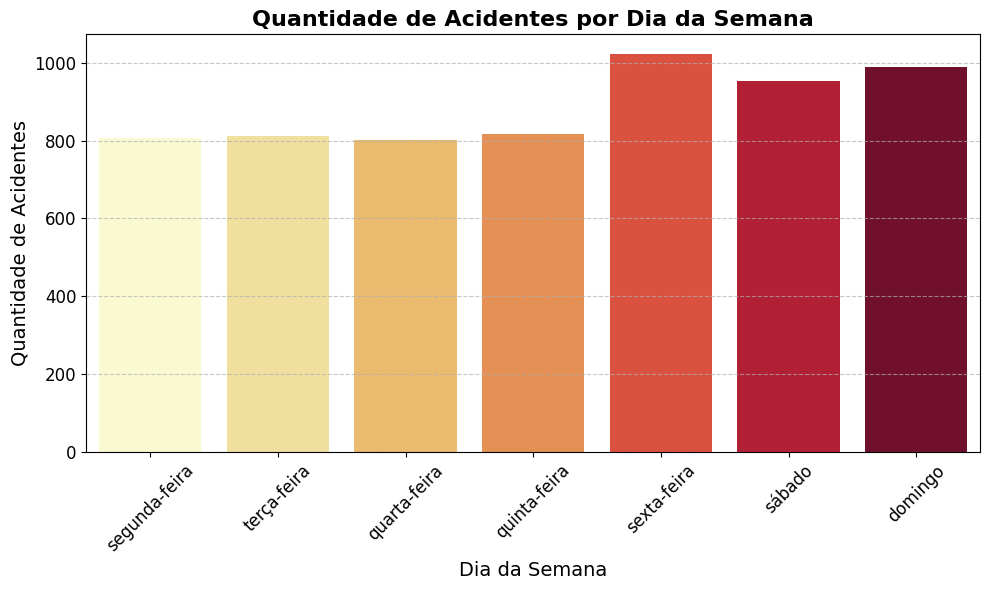

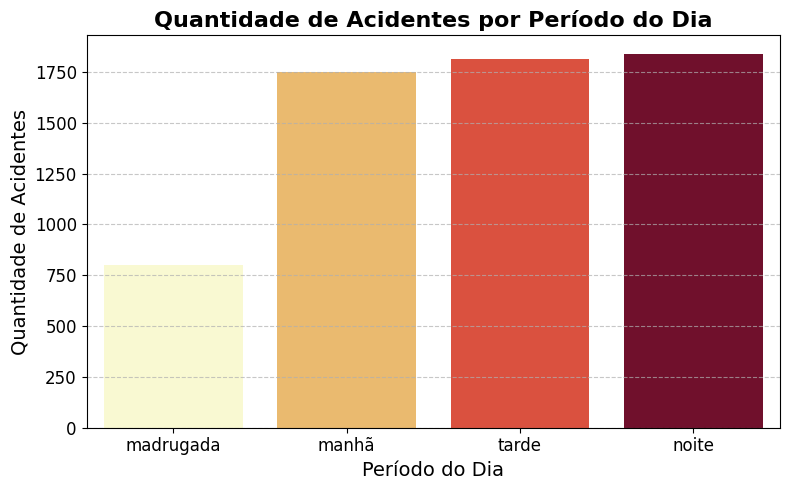

In [113]:
# Interação com o usuário
brs_fornecidas = input("Quais BRs você utilizará? (responda com o número da BR separados por espaço): ")
ufs_fornecidas = input("Em quais estados você transitará? (responda com a UF separadas por espaço, ex: SP RJ): ")

# Processar as entradas
brs_usuario = list(map(str, brs_fornecidas.split()))  # Transformar BRs em lista de strings
ufs_usuario = list(map(str, ufs_fornecidas.split()))  # Transformar UFs em lista de strings

# Filtrar o dataset
dataset_filtrado = filtrar_por_br_e_uf(brs_usuario, ufs_usuario)

# Gerar o gráfico com o dataset filtrado
grafico_acidentes_por_dia(dataset_filtrado)

print()

# Gerar o gráfico com o dataset filtrado
grafico_acidentes_por_periodo(dataset_filtrado)